In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [61]:
path_to_models = './../models/'


perturb_models_to_analyze = ['160M/160M_exp1_0_perturb', '410M/410M_exp1_0_perturb']

propagation_files = ["/propagations.csv" for _ in range(len(perturb_models_to_analyze))]

In [62]:
all_df = [pd.read_csv(path_to_models + model + file) for model, file in zip(perturb_models_to_analyze, propagation_files)]

In [63]:
#sets the actual words as the column number
all_df = [(df.set_index("original").T) for df in all_df]

In [75]:
#extract propagations for the top 10 in left file
top_10_init = all_df[0].iloc[:, :]
print(top_10_init)

original      next    say   grow  accept   help  voice  permit   move    way  \
correctness  0.469  0.484  0.485   0.486  0.489  0.491   0.494  0.496  0.496   

original       own  ...  first  small   idea  analysis    try  monitor  start  \
correctness  0.498  ...  0.521  0.524  0.527     0.527  0.528    0.531  0.533   

original      fell  device    guy  
correctness  0.534   0.536  0.543  

[1 rows x 45 columns]


In [76]:
print(all_df[1][top_10_init.columns])

original      next  say   grow  accept   help  voice  permit   move    way  \
correctness  0.467  0.5  0.487   0.495  0.477  0.486   0.499  0.507  0.486   

original       own  ...  first  small   idea  analysis    try  monitor  start  \
correctness  0.504  ...  0.529   0.51  0.543     0.514  0.518    0.528  0.537   

original      fell  device    guy  
correctness  0.531   0.517  0.537  

[1 rows x 45 columns]


In [77]:
x = [model.split("/")[1] for model in perturb_models_to_analyze]
x

['160M_exp1_0_perturb', '410M_exp1_0_perturb']

[0.469, 0.467]
[0.484, 0.5]
[0.485, 0.48700000000000004]
[0.486, 0.495]
[0.489, 0.47700000000000004]
[0.491, 0.486]
[0.494, 0.499]
[0.496, 0.507]
[0.496, 0.486]
[0.498, 0.504]
[0.498, 0.506]
[0.498, 0.498]
[0.5, 0.507]
[0.5, 0.524]
[0.5, 0.51]
[0.5, 0.503]
[0.501, 0.514]
[0.502, 0.505]
[0.504, 0.526]
[0.504, 0.498]
[0.505, 0.503]
[0.505, 0.505]
[0.506, 0.51]
[0.507, 0.493]
[0.508, 0.51]
[0.509, 0.496]
[0.509, 0.507]
[0.51, 0.519]
[0.512, 0.517]
[0.512, 0.515]
[0.512, 0.512]
[0.512, 0.505]
[0.515, 0.512]
[0.515, 0.505]
[0.521, 0.522]
[0.521, 0.529]
[0.524, 0.51]
[0.527, 0.5429999999999999]
[0.527, 0.514]
[0.528, 0.518]
[0.531, 0.528]
[0.5329999999999999, 0.537]
[0.534, 0.531]
[0.536, 0.517]
[0.5429999999999999, 0.537]


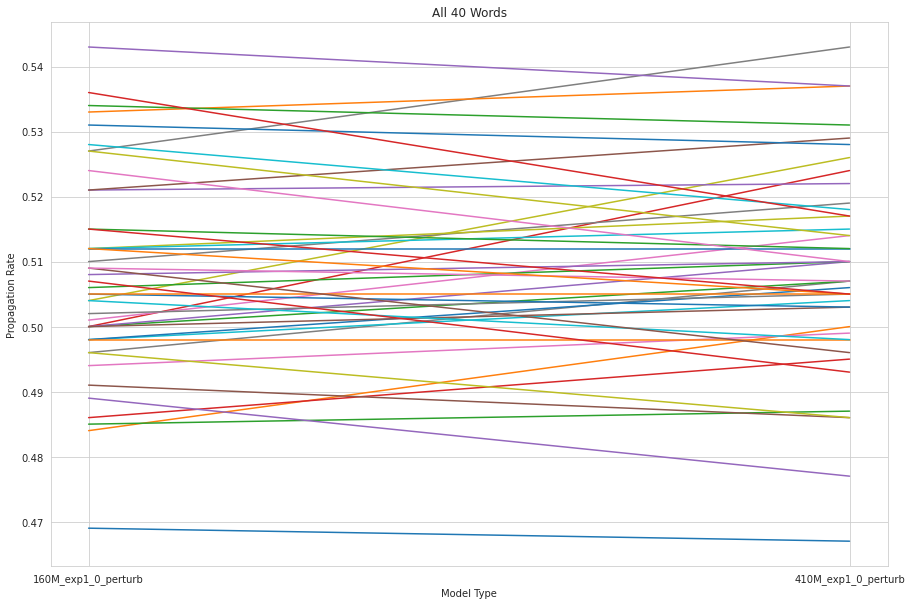

In [79]:
plt.figure(figsize=(15, 10))


for word in list(top_10_init.columns):
    tempy = [list(df[word])[0] for df in all_df]
    print(tempy)
    sns.lineplot(x=x, y=tempy)

# plt.title("All 40 Words")
plt.title("All 40 Words")

plt.xlabel("Model Type")
plt.ylabel("Propagation Rate")
# plt.legend(loc="best")
plt.grid(True)
plt.show()


In [74]:
print(all_df[0].T["correctness"].mean())

0.5079333333333335
